# House price prediction

Extracted from this ref. [book](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=asc_df_1492032646/?tag=googleshopp00-20&linkCode=df0&hvadid=379733272930&hvpos=&hvnetw=g&hvrand=5358833530171969532&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001652&hvtargid=pla-523968811896&psc=1)


Chapter 2 of Hands on Machine Learning With Scikit-Learn and Keras; 

### Download data

In [1]:
import os
import tarfile
import urllib
from matplotlib import pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()    

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

df = load_housing_data()

 - Define goal. 
 
     * create a model that predict median house value

In [3]:
df[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### EDA ( exploratory data analysis) 

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Lets look at other fields, `describe()` method give a summary for numerical attributes. 

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

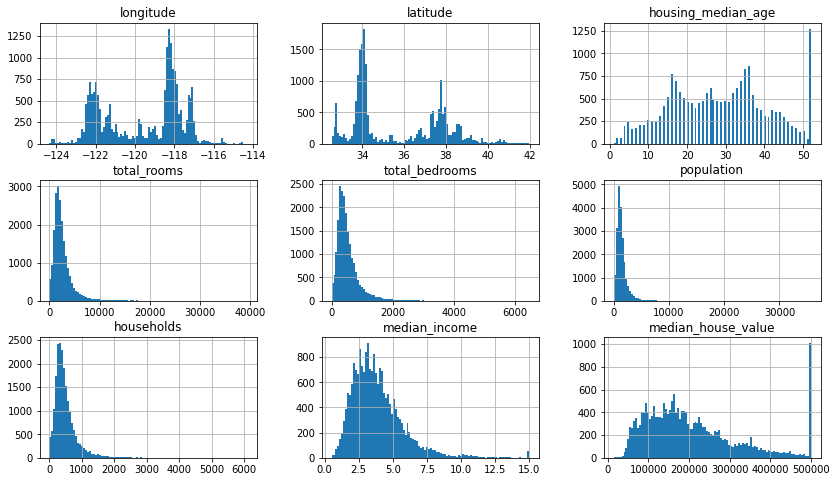

In [9]:
df.hist(figsize=(14,8), bins=100)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

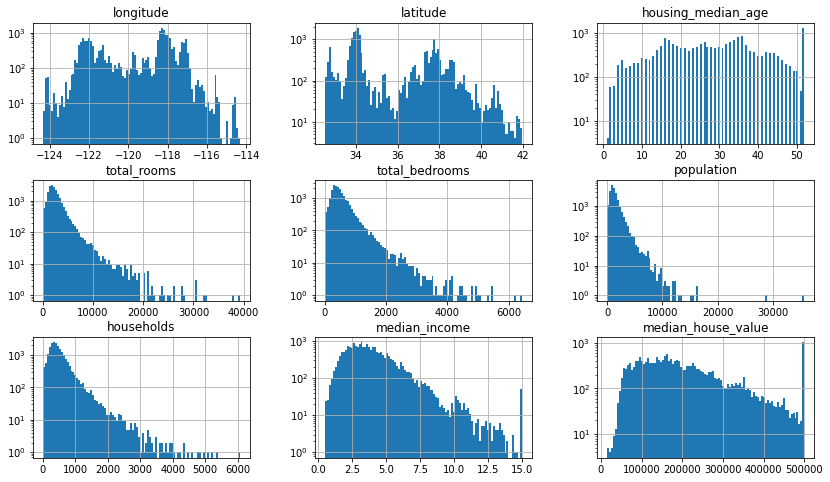

In [10]:
df.hist(figsize=(14,8), bins=100, log=True)

first thing ever in a dataset project is to split in train and test chunks. 

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=10)

In [12]:
train_set.shape

(14448, 10)

In [13]:
train_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        150
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
train_set[train_set['total_bedrooms'].isnull()][:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND
2608,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,98800.0,<1H OCEAN
8337,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,153800.0,<1H OCEAN


<AxesSubplot:ylabel='Frequency'>

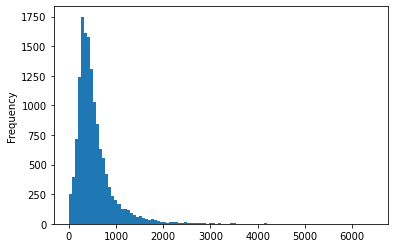

In [15]:
train_set['total_bedrooms'].plot.hist(bins=100)

In [16]:
train_set['total_bedrooms'].median()

434.0

In [17]:
# fill null entry for total_badroom using the median values
# train_set['total_bedrooms'].fillna(train_set['total_bedrooms'].median())
import numpy as np

from sklearn.impute import SimpleImputer
preprocessor = SimpleImputer(missing_values=np.nan, strategy='median')
preprocessor.fit(train_set['total_bedrooms'].values.reshape(-1,1))

train_set['total_bedrooms_prep'] = preprocessor.transform(train_set['total_bedrooms'].values.reshape(-1,1))

---- preprocessing, data normalization etc...
* fit
* transform 
* fit_transform

---- models

* fit
* predict 
* fit_predict

In [18]:
# train_set[train_set['total_bedrooms'].isnull()]

In [19]:
# feature engineering to compute per houserolds and total_rooms

train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms_prep"]/train_set["total_rooms"]
train_set["population_per_household"]=train_set["population"]/train_set["households"]

# test data
# TODO, pack to pipeline using CombinedAttributesAdder
# test_set["rooms_per_household"] = test_set["total_rooms"]/test_set["households"]
# test_set["bedrooms_per_room"] = test_set["total_bedrooms_prep"]/test_set["total_rooms"]
# test_set["population_per_household"]=test_set["population"]/test_set["households"]

In [20]:
train_set['ocean_proximity'].value_counts()

<1H OCEAN     6431
INLAND        4576
NEAR OCEAN    1851
NEAR BAY      1587
ISLAND           3
Name: ocean_proximity, dtype: int64

In [21]:
# label encoder for mutually excludent categorical feature. 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_set['ocean_proximity'])


LabelEncoder()

In [22]:
train_set_num = train_set.drop(['total_bedrooms', 'ocean_proximity'], axis=1)

In [23]:
train_set_num[:3]

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_bedrooms_prep,rooms_per_household,bedrooms_per_room,population_per_household
17853,-121.88,37.44,23.0,1310.0,910.0,261.0,5.3994,237900.0,267.0,5.019157,0.203817,3.486590
15963,-122.44,37.71,52.0,2711.0,1848.0,524.0,3.9567,251500.0,591.0,5.173664,0.218001,3.526718
20106,-120.29,37.94,17.0,1459.0,753.0,271.0,3.0500,144800.0,297.0,5.383764,0.203564,2.778598


In [24]:
# standard scaler is transform this histogram to have mean value zero, and stardard deviation 1

standard_scaler = preprocessing.StandardScaler()

standard_scaler.fit(train_set_num)

train_set_scaled = standard_scaler.transform(train_set_num)


In [25]:
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set_num.columns)


In [26]:
train_set_scaled['ocean_proximity'] = le.transform(train_set['ocean_proximity'])

In [27]:
train_set_scaled[:2]

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_bedrooms_prep,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-1.147237,0.839997,-0.443505,-0.614686,-0.453505,-0.629779,0.812270,0.271773,-0.649646,-0.166643,-0.157819,0.064945,0
1,-1.426429,0.966033,1.854150,0.039994,0.371821,0.066257,0.048889,0.390091,0.133150,-0.103632,0.053898,0.070795,3


In [28]:
y_train = train_set_scaled['median_house_value'].values
X_train = train_set_scaled.drop('median_house_value', axis=1).values


In [29]:
y_train.shape

(14448,)

In [30]:
X_train.shape

(14448, 12)

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [70]:
tree.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

### preparing testing dataset following the same steps we did for training. 

* fill null; 
* standard scaler with drop ['total_bedrooms', 'ocean_proximity'],
* label encoder of ocean_proximity

In [71]:
# fill null values with median (preprocessor already fitted above)
test_set['total_bedrooms_prep'] = preprocessor.transform(test_set['total_bedrooms'].values.reshape(-1,1))

# create new features (feature engineering)
test_set["rooms_per_household"] = test_set["total_rooms"]/test_set["households"]
test_set["bedrooms_per_room"] = test_set["total_bedrooms_prep"]/test_set["total_rooms"]
test_set["population_per_household"]=test_set["population"]/test_set["households"]

# separate numerical attributes
test_set_num = test_set.drop(['total_bedrooms', 'ocean_proximity'], axis=1)

# perform standrad scaler with `standard_scaler` already fitted on train data
test_set_scaled = standard_scaler.transform(test_set_num)

# convert to dataframe for convenience
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set_num.columns)

# recover categorical feature but with encoder already fitted in training data
test_set_scaled['ocean_proximity'] = le.transform(test_set['ocean_proximity'])

# create test feature and target
y_test = test_set_scaled['median_house_value'].values
X_test = test_set_scaled.drop('median_house_value', axis=1).values

In [72]:
y_test.shape, X_test.shape

((6192,), (6192, 12))

In [73]:
from sklearn.metrics import mean_squared_error 

# y_pred = tree.predict(X_test)
y_pred = rfr.predict(X_test)

# squared = False to return the RMSE (root mean square error)
rms = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
rms

0.4406839211390981

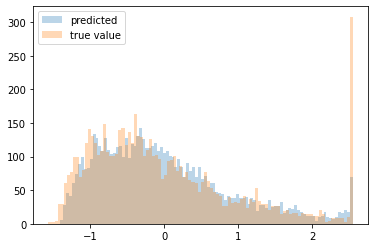

In [74]:
from matplotlib import pyplot as plt
plt.hist(y_pred, bins=100, label='predicted', alpha=0.3)
plt.hist(y_test, bins=100, label='true value', alpha=0.3)
plt.legend()

In [75]:
test_set_scaled_predicted = test_set_scaled.copy(deep=True)
test_set_scaled_predicted['median_house_value'] = y_pred

In [76]:
y_pred_not_scaled = pd.DataFrame(
    standard_scaler.inverse_transform(
        test_set_scaled_predicted.drop('ocean_proximity', axis=1)
    ), columns = test_set_num.columns)['median_house_value']

In [77]:
y_true_not_scaled = test_set['median_house_value']

In [78]:
rms_not_scaled = mean_squared_error(y_true=y_true_not_scaled, y_pred=y_pred_not_scaled, squared=False)
rms_not_scaled

50653.9843201653

In [83]:
y_pred_not_scaled[1]

383362.03

In [84]:
# 68 % C.L
[y_pred_not_scaled[1] - rms_not_scaled, y_pred_not_scaled[1] + rms_not_scaled] 

[332708.04567983473, 434016.0143201653]

In [80]:
test_set.iloc[1]['median_house_value']

354100.0

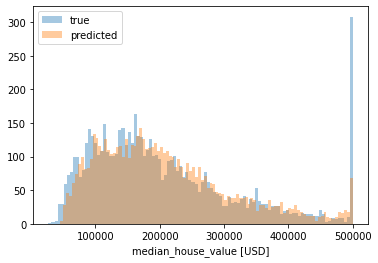

In [85]:
_ = plt.hist(test_set['median_house_value'], bins=100, label='true', alpha=0.4)
_ = plt.hist(y_pred_not_scaled, bins=100, label='predicted', alpha=0.4)
plt.xlabel('median_house_value [USD]')
plt.legend()


### Goals for EDA; 

* observe duplicated datapoints (remove them); 
* null entry and treat accordingly; 
* outlier identification (consider remove outliers) - min, max scaler is a candidate method.
* encode categorical features (one hot encoding or label encoding depending of feature nature)
* scale numerical feature such that its mean value is zero and standard deviation is 1. 

In [86]:
# Compose scikit learn pipeline;
# Cross-validation training;  
# Overfitting; 
# Grid search to tunne hyperparameter model; 

In [89]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    # ('feature_compose', feature_compose) 
    ('replace_null', preprocessor), 
    ('label_encoder', le), 
    ('standard_scaler', standard_scaler), 
    ('regressor', DecisionTreeRegressor())
)

pipe.fit()
pipe.predict()

TypeError: __init__() takes 2 positional arguments but 5 were given